In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [10]:
# Charger les données préparées
train = pd.read_csv("../data/train_ready.csv")



In [11]:
# Normalisation des données pour améliorer la performance des algorithmes
scaler = StandardScaler()
numeric_cols = train.select_dtypes(include=['number']).columns
train_scaled = scaler.fit_transform(train[numeric_cols])


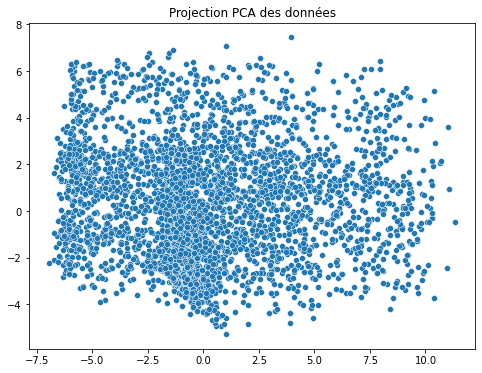

In [12]:
# Réduction de dimension avec PCA pour visualisation
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1])
plt.title("Projection PCA des données")
plt.show()

In [20]:
# 2️⃣ Clustering avec K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(train_scaled)
train["KMeans_Cluster"] = kmeans_labels


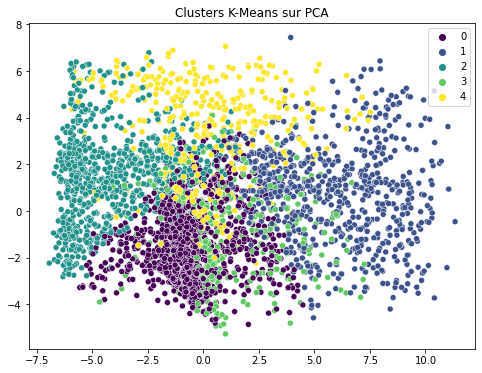

In [19]:
# Visualisation des clusters K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("Clusters K-Means sur PCA")
plt.show()


In [26]:
# Clustering avec GMM (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(train_scaled)
train["GMM_Cluster"] = gmm_labels

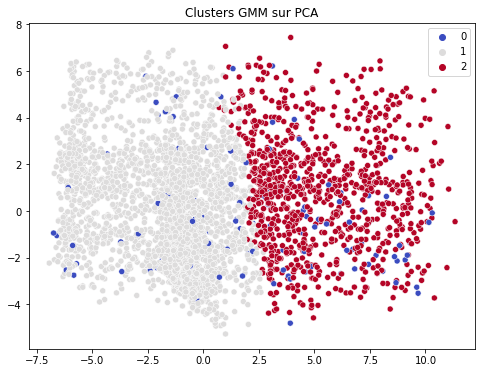

In [27]:
# Visualisation des clusters GMM
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=gmm_labels, palette="coolwarm")
plt.title("Clusters GMM sur PCA")
plt.show()

In [31]:
# Clustering avec DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(train_scaled)
train["DBSCAN_Cluster"] = dbscan_labels

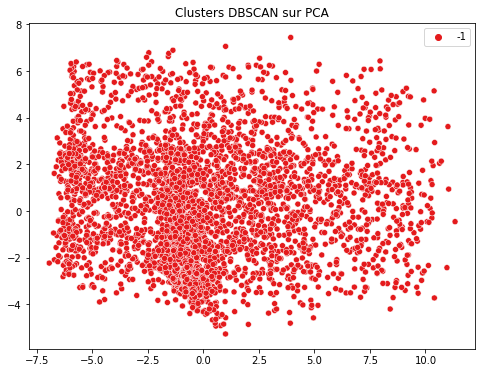

Les clusters ont été ajoutés et le dataset a été sauvegardé dans data/train_clustered.csv


In [32]:
# Visualisation des clusters DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=dbscan_labels, palette="Set1")
plt.title("Clusters DBSCAN sur PCA")
plt.show()

# Sauvegarde des résultats
train.to_csv("../data/train_clustered.csv", index=False)
print("Les clusters ont été ajoutés et le dataset a été sauvegardé dans data/train_clustered.csv")